# Load modules and paths

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../helpers/")#/glade/derecho/scratch/mmkupilas/Analysis/WACCM-RR/helper_templates/Plot_2D_time_height.py
# import utils
import importlib
import Plot_2D_time_height
importlib.reload(Plot_2D_time_height) # this reloads the module in case there have been saved changes

# path_nonrr='/glade/campaign/acom/acom-climate/nadavis/WACCM/FWmaHIST_ne30pg3_ne30pg3_mg17_no_conus_gravity_waves/atm/hist/'
# path_rr='/glade/campaign/acom/acom-climate/nadavis/WACCM/FWmaHIST_ne0CONUSne30x8_ne0CONUSne30x8_mt12_no_conus_gravity_waves/atm/hist/'
# path_out_temp='/glade/derecho/scratch/mmkupilas/Analysis/temp_data/'
# path_out_cm='/glade/derecho/scratch/mmkupilas/Analysis/WACCM-RR/analysis/profiles_cm/processed_data/'

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

## Seasonality

In [55]:
#Function definitions

def use_preset(use_z,var,use_options):
    #---------------------------------------------
    # This function defines the presets for variables and auto
    #---------------------------------------------
    if use_options == 'auto':
        use_var = 'zzz' # So that auto settings are only defined in one place, this groups 'auto' and variables with unspecified presets into one case in the if statement
    else:
        use_var=var
    #---------------------------------------------
    # Options that are used for every preset (except auto, which will overwrite these)
    #---------------------------------------------
    format_cbar = 'f'
    format_cont = 'f'
    
    #---------------------------------------------
    # O
    #---------------------------------------------
    if use_var == 'O':
        use_log = True                                # Take log10 of data
        use_scaling = False                           # No scaling
        scale_factor = 1e0                            # Scale factor = 1
        qr = [-5,0,6]                                 # Colourbar limits and number of steps
        diff_type = 'frac'                            # Plot RR/non-RR difference
        if use_z == True:                        # Use different values on altitude levels or pressure levels
            diffqr = [0.5,3,6]                       # Diff colourbar limits and number of steps
            ncont1 = [-5,-4,-3,-2,-1.5,-1,-0.8]       # Non-RR contours
            ncont2 = [-5,-4,-3,-2,-1.5,-1,-0.8]       # RR contours
            diffcont = [0.5,0.6,0.7,0.8,0.9,1,1.1,\
                        1.2,1.5,1.8,2,2.5]            # Diff contours
        else:
            diffqr = [0.5,4.5,5]                       # Diff colourbar limits and number of steps
            ncont1 = [-5,-4,-3,-2,-1.5,-1,-0.8]       # Non-RR contours
            ncont2 = [-5,-4,-3,-2,-1.5,-1,-0.8]       # RR contours
            diffcont = [1,1.1,1.2,1.3,1.4,1.5,\
                        1.8,2,2.5,3.5,4.5]            # Diff contours
        override_cbar = True                          # use the specified precision for colourbar ticks
        fmt1_cbar = 0                                 # Non-RR: 0 dp
        fmt2_cbar = 0                                 # RR: 0 dp
        fmtdiff_cbar = 1                              # Diff: 1 dp
        override_cont = True                          # Use the specified precision for contour labels
        fmt1_cont = 1                                 # Non-RR: 1 dp
        fmt2_cont = 1                                 # RR: 1 dp
        fmtdiff_cont = 1                              # Diff: 1 dp
    
    #---------------------------------------------
    # O_n
    #---------------------------------------------
    elif use_var == 'O_n':
        use_log = True                                # Take log10 of data
        use_scaling = False                           # No scaling
        scale_factor = 1e0                            # Scale factor = 1
        qr = [9,12,7]                              # Colourbar limits and number of steps
        diff_type = 'frac'                            # Plot RR/non-RR difference
        if use_z == True:                        # Use different values on altitude levels or pressure levels
            diffqr = [0.5,4.0,8]                      # Diff colourbar limits and number of steps
            ncont1 = [9.0,9.5,10.0,10.5,11.0,11.5]    # Non-RR contours
            ncont2 = [9.0,9.5,10.0,10.5,11.0,11.5]    # RR contours
            diffcont = [0.5,1.0,1.2,1.4,1.6,1.8,\
                        2.0,2.5,3.0,3.5,4.0]          # Diff contours
        else:
            diffqr = [0.5,4.5,9]                      # Diff colourbar limits and number of steps
            ncont1 = [9.0,9.5,10.0,10.5,11.0,11.5,\
                     11.6,11.7,11.8,11.9,12.0]        # Non-RR contours
            ncont2 = [9.0,9.5,10.0,10.5,11.0,11.5,\
                     11.6,11.7,11.8,11.9,12.0]        # RR contours
            diffcont = [1.1,1.2,1.3,1.4,1.5,\
                        1.8,2.0,2.5,3.5,4.5]          # Diff contours
        override_cbar = True                          # use the specified precision for colourbar ticks
        fmt1_cbar = 1                                 # Non-RR: 2 dp
        fmt2_cbar = 1                                 # RR: 2 dp
        fmtdiff_cbar = 1                              # Diff: 1 dp
        override_cont = False                         # Use precision of contour labels as defined
        fmt1_cont = 1                                 # not used
        fmt2_cont = 1                                 # not used
        fmtdiff_cont = 1                              # not used   
    
    #---------------------------------------------
    # O3
    #---------------------------------------------
    elif use_var == 'O3':
        use_log = False                               # Don't take log of data
        use_scaling = True                            # Use scaling
        scale_factor = 1e6                            # Report values in ppm
        qr = [0,7,8]                                  # range and number of steps for cbar
        diff_type = 'frac'                            # Plot RR/non-RR difference
        diffqr = [0,10,6]                             # Diff colourbar range and number of steps
        ncont1 = [0.3,0.6,0.9,1,2,3,4,5,6]            # Non-RR contour values
        ncont2 = [0.3,0.6,0.9,1,2,3,4,5,6]            # RR contour values
        diffcont = [0.2,0.4,0.6,0.8,1,1.5,2,4,6,8,10] # Diff contour values
        override_cbar = True                          # Use the specified precision for colourbar ticks
        fmt1_cbar = 0                                 # Non-RR: 0 dp
        fmt2_cbar = 0                                 # RR: 0 dp
        fmtdiff_cbar = 1                              # Diff: 1 dp
        override_cont = True                          # Use the specified precision for contour labels
        fmt1_cont = 1                                 # Non-RR: 1 dp
        fmt2_cont = 1                                 # RR: 1 dp
        fmtdiff_cont = 1                              # Diff: 1 dp
    
    #---------------------------------------------
    # H2O
    #---------------------------------------------
    elif use_var == 'H2O':
        use_log = True                                # Take log10 of data
        use_scaling = False                           # Don't scale the data
        scale_factor = 1e0                            # scale factor = 1
        qr = [-8,-5,7]                                # colourbar range and number of steps
        diff_type = '%'                               # Plot percentage difference between RR and non-RR
        diffqr = [-80,-10,8]                          # Diff plot colourbar and numbe of steps
        ncont1 = [-7.5,-7.25,-7.00,-6.75,-6.50,\
                  -6.25,-6.00,-5.75,-5.50]            # Non-RR contour values
        ncont2 = [-7.5,-7.25,-7.00,-6.75,-6.50,\
                  -6.25,-6.00,-5.75,-5.50]            # RR contour values
        diffcont = np.arange(-75,5,5).tolist()        # Diff plot contour values
        override_cbar = True                          # Use the specified precison for colourbar ticks
        fmt1_cbar = 1                                 # Non-RR: 1 dp
        fmt2_cbar = 1                                 # RR: 1 dp
        fmtdiff_cbar = 1                              # Diff: 1 dp
        override_cont = False                          # Use the specified precison for contour labels
        fmt1_cont = 2                                 # Non-RR: 2 dp
        fmt2_cont = 2                                 # RR: 2 dp
        fmtdiff_cont = 1                              # Diff: 1 dp
    
    #---------------------------------------------
    # NO
    #---------------------------------------------
    elif use_var == 'NO':
        use_log = True                                # Take log10 of data
        use_scaling = False                           # No scaling
        scale_factor = 1e0                            # Scale factor = 1
        qr = [-8,-3,6]                                # Colourbar limits and number of steps
        diff_type = 'frac'                            # Plot RR/non-RR difference
        diffqr = [0.5,2.5,5]                          # Diff colourbar limits and number of steps
        ncont1 = [-8,-7, -6, -5, -4, -3.5]            # Non-RR contours
        ncont2 = [-8,-7, -6, -5, -4, -3.5]            # RR contours
        diffcont = [0.7, 0.8, 0.9, 1.0,1.1, 1.2,\
                    1.3,1.4,1.6,1.8,2,0,2.2,2.4]      # Diff contours
        override_cbar = True                          # use the specified precision for colourbar ticks
        fmt1_cbar = 0                                 # Non-RR: 0 dp
        fmt2_cbar = 0                                 # RR: 0 dp
        fmtdiff_cbar = 1                              # Diff: 1 dp
        override_cont = True                          # Use the specified precision for contour labels
        fmt1_cont = 1                                 # Non-RR: 1 dp
        fmt2_cont = 1                                 # RR: 1 dp
        fmtdiff_cont = 1                              # Diff: 1 dp
        
    #---------------------------------------------
    # CO2
    #---------------------------------------------
    elif use_var == 'CO2':
        use_log = False                               # Don't take log of data
        use_scaling = True                            # Use scaling
        scale_factor = 1e6                            # Report values in ppm
        qr = [50,400,8]                              # range and number of steps for cbar
        diff_type = '%'                               # Plot RR/non-RR difference
        diffqr = [-5,145,6]                             # Diff colourbar range and number of steps
        ncont1 = [100,150,200,250,300,350]            # Non-RR contour values
        ncont2 = [100,150,200,250,300,350]            # RR contour values
        diffcont = [-0.5,0,10,20,40,60,80,100,120,140]# Diff contour values
        override_cbar = True                          # Use the specified precision for colourbar ticks
        fmt1_cbar = 0                                 # Non-RR: 0 dp
        fmt2_cbar = 0                                 # RR: 0 dp
        fmtdiff_cbar = 1                              # Diff: 1 dp
        override_cont = False                          # Use the specified precision for contour labels
        fmt1_cont = 0                                 # Not used
        fmt2_cont = 0                                 # Not used
        fmtdiff_cont = 0                              # Not used
    
    #---------------------------------------------
    # CO
    #---------------------------------------------
    elif use_var == 'CO':
        use_log = False                               # Don't take log of data
        use_scaling = True                            # Use scaling
        scale_factor = 1e6                            # Report values in ppm
        qr = [0,60,7]                                 # range and number of steps for cbar
        diff_type = '%'                               # Plot RR/non-RR difference
        diffqr = [-30,20,6]                           # Diff colourbar range and number of steps
        ncont1 = [10,20,30,40,50,60]                  # Non-RR contour values
        ncont2 = [10,20,30,40,50,60]                  # RR contour values
        diffcont = [-30,-24,-18,-12,-6,0,6,12,18]     # Diff contour values
        override_cbar = True                          # Use the specified precision for colourbar ticks
        fmt1_cbar = 0                                 # Non-RR: 0 dp
        fmt2_cbar = 0                                 # RR: 0 dp
        fmtdiff_cbar = 1                              # Diff: 1 dp
        override_cont = True                          # Use the specified precision for contour labels
        fmt1_cont = 0                                 # Not used
        fmt2_cont = 0                                 # Not used
        fmtdiff_cont = 0                              # Not used
    
    #---------------------------------------------
    # T
    #---------------------------------------------
    elif use_var == 'T':
        use_log = False                               # Do not take log of data
        use_scaling = False                           # Do not scale the data
        scale_factor = 1e0                            # Scale factor = 1
        qr = [180,450,7]                              # Colourbar range and number of steps
        diff_type = 'abs'                             # Use RR - non-RR difference
        diffqr = [-90,30,5]                           # diff plot colourbar range and number of steps
        ncont1 = [181,184,188,191,194,200,250,\
                  300,350,400,450]                    # Non-RR contour locations
        ncont2 = [200, 205,210,250,275,300,350,\
                  400,450]                            # RR contour locations
        diffcont = [-75,-45,-15,0,5,10,15,20,22]      # Diff contour locations
        override_cbar = True                          # Use the specified precison for colourbar ticks
        fmt1_cbar = 0                                 # Non-RR: 0 dp
        fmt2_cbar = 0                                 # RR: 0 dp
        fmtdiff_cbar = 0                              # Diff: 0 dp
        override_cont = True                          # Use the specified precison for colourbar ticks
        fmt1_cont = 0                                 # Non-RR: 0 dp
        fmt2_cont = 0                                 # RR: 0 dp
        fmtdiff_cont = 0                              # Diff: 0 dp
    
    #---------------------------------------------
    # Auto
    #---------------------------------------------
    else:
        if use_var != 'zzz':
            # Prints a message to say presets do not exist for the specified var
            print(f'No presets available for {var}, using auto') 
        
        use_log = False                               # Do not take log of data
        use_scaling = False                           # Do not scale data
        scale_factor = 1e0                            # Scale factor = 1
        qr = None                                     # Automatically calculate the min and max values
        diff_type = 'frac'                            # Currently using frac (useful for detemining presets), None also now possible 
        diffqr = None                                 # Automatically calculate diff plot range
        ncont1 = 10                                   # 10 contours in Non-RR
        ncont2 = 10                                   # 10 contours in RR
        diffcont = 10                                 # 10 contours in diff
        format_cbar = 'e'                             # Use scientific notation for colourbar ticks
        override_cbar = True                          # Not used when format_cbar = 'e'
        fmt1_cbar = 2                                 # Non-RR colourbar ticks to 2 dp
        fmt2_cbar = 2                                 # RR colourbar ticks to 2 dp
        fmtdiff_cbar = 2                              # Diff colourbar ticks to 2 dp
        format_cont = 'e'                             # Use scientific notation for contour labels
        override_cont = True                          # Not used when format_cbar = 'e'
        fmt1_cont = 2                                 # Non-RR contour labels to 2 dp
        fmt2_cont = 2                                 # RR contour labels to 2 dp
        fmtdiff_cont = 2                              # Diff contour labels to 2 dp
    
    #---------------------------------------------
    # return all values
    #---------------------------------------------
    return use_log,use_scaling,scale_factor,qr,diff_type,diffqr,ncont1,ncont2,diffcont,fmt1_cbar,fmt2_cbar,fmtdiff_cbar,fmt1_cont,fmt2_cont,fmtdiff_cont,override_cbar,override_cont, format_cbar,format_cont

def autoset_titles(time_str,var,use_log,scale_factor,diff_type,label_subplots,label_start):
    #---------------------------------------------
    # This function automatically generates titles for the three plots of the form.
    # [a)] Non-RR [time average] [var] [unit]
    # [b)] RR [time average] [var] [unit]
    # [c)] [var] [calculation of diff]
    #---------------------------------------------
    
    #---------------------------------------------
    # specify the time range the average is over
    #---------------------------------------------
    if time_str == "night":
        time="night-time "
    elif time_str == "day":
        time = "day-time "
    else:
        time = ""
    
    #---------------------------------------------
    # Format variable names with subscripts
    #---------------------------------------------    
    formatted_var = var.replace('1','$_1$').replace('2','$_2$').replace('3','$_3$').replace('4','$_4$')
    
    #---------------------------------------------
    # Calcualate the units (or equivalent): concentration, (K), (vmr), (ppm), (ppt), 
    #   or specify the scale factor if it is not one of the standard ones
    #---------------------------------------------
    if '_n' in formatted_var:
        formatted_var = formatted_var.replace('_n','')
        conc = '(cm$^{-3}$)'
        # If concentration has been scaled, specify the scale factor in 10^x form
        if scale_factor != 1e0:
            print(str(scale_factor))
            components='{:.0e}'.format(scale_factor).split('e')
            if components[0] == '1':
                conc = '(× 10$^{'+components[1].replace('+','')+'}$ cm$^{-3}$)'
            else:
                conc = '('+components[0]+' × 10$^{'+components[1]+'}$ cm$^{-3}$)'
    else:
        if var == 'T':
            conc = '(K)'
        else:
            conc = '(vmr)'
            if scale_factor == 1e6:
                conc = '(ppm)'
            elif scale_factor == 1e9:
                conc = '(ppb)'
            elif scale_factor == 1e0:
                pass
            else:                                           # scale factor is not one of the standard scaling factors
                #remove the ending bracket from the unit (if present) and append the scale factor, once formatted.
                conc = conc.replace(')','')
                components='{:.0e}'.format(scale_factor).split('e')
                if components[0] == '1':
                    conc = conc + ' × 10$^{'+components[1]+'}$'+')'
                else:
                    conc = conc +' '+ components[0]+' × 10$^{'+components[1].replace('+','')+'}$'+')'
    
    #---------------------------------------------
    # Include log10 if required
    #---------------------------------------------    
    if use_log == True:
        conc = 'log$_{10}$'+conc
        if '_n' in var:                                      # Specify log is of per cm-3 if required
            split_conc=conc.split('(')
            conc = split_conc[0]+'( / '+split_conc[1]
    
    #---------------------------------------------
    # If the subplots need labelling with a), b), c) or equivalent, add it in
    #--------------------------------------------- 
    alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s',\
                't','u','v','w','x','y','z']                # List of labels to use, in order
    if label_subplots == True:                              # If plots should be labelled
        start_loc = alphabet.index(label_start)             # Locate the starting letter provided (label_start)
        if start_loc > len(alphabet)-3:                     # If starting letter is y or z, the alphabet will run out
            # Warn user, and don't use labels in the title
            print(f'Cannot start labelling at {label_start}, it will run out of letters! Not using labels!')
            ax0_title = 'Non-RR '+time+formatted_var        # Don't use labels in the title
            ax1_title = 'RR '+ time+formatted_var
            diff_title = formatted_var
        else:                                               # If there are enough letters to use, label sequentially from label_start
            ax0_title = alphabet[start_loc]+') Non-RR '+time+formatted_var
            ax1_title = alphabet[start_loc+ 1]+') RR '+ time+formatted_var
            diff_title = alphabet[start_loc+2]+') '+ formatted_var
    else:                                                   # If plots shouldn't be labelled, don't add labels
        ax0_title = 'Non-RR '+time+formatted_var
        ax1_title = 'RR '+ time+formatted_var
        diff_title = formatted_var
    
    #---------------------------------------------
    # Construct Non-RR and RR plot titles
    #--------------------------------------------- 
    ax0_title = ax0_title + ' '+ conc
    ax1_title = ax1_title + ' '+ conc
    
    #---------------------------------------------
    # Include the calcualtion of the diff in the diff plot title
    #---------------------------------------------
    if diff_type == 'frac':
        diff_title = diff_title + ' RR/Non-RR'
    elif diff_type == '%':
        diff_title = diff_title + ' % change'
    elif diff_type == 'abs':
        diff_title = diff_title + ' RR − Non-RR'
        if var == 'T': # T is a special case as it also gets units
            diff_title = diff_title + '(ΔK)'
    else: # If diff is not frac, abs or %, don't produce a title
        diff_title = None
    
    return ax0_title,ax1_title,diff_title

In [39]:
#================================================
# USER INPUT - choose what to plot
#================================================


path = '/resstore/b0243/Data/mmkupilas/processed_data/monthly_domain_average/'    # path to input data
z_axis_str = 'on_lev'                              # Plot on pressure or altitude. Options on_lev, on_z
time_str = 'diur'                                  # Time average used. Options: diur, day, night
var = 'H2O'                                         # variable to plot. Options: O, O_n, NO, NO_n, CO, CO_n, CO2, CO2_n, O3, O3_n, H2O, H2O_n, T
save_fig = False                                    # Save the output figure: True/False
save_path = '../../plots/'                         # path to directory for completed plots

use_options = 'preset'                             # Options: preset, custom, auto (TODO - not fully working) 
#==================================================
# Preset: use the standard options for the variable, or auto if they are not defined
# Auto: use values determined automatically that span the data (recommended for initial visualisation). Always produced a frac diff plot
# Custom: use the values defined in the next cell
#==================================================

#Controls for paper plots
label_subplots = True                             # Automatically add a), b), c etc to subplot labels
label_start = 'g'                                  # Which letter to start automatically numbering subplots from


# Provide Non-RR and RR input files
ds_nonrr = xr.open_dataset(f'{path}{z_axis_str}_nonrr_{time_str}_cm_2010.nc')[[var]]
ds_rr = xr.open_dataset(f'{path}{z_axis_str}_rr_{time_str}_cm_2010.nc')[[var]]

# If only plotting one of RR/non-RR
plot_one = False                                   # Only plot one of Non-RR and RR
plot_which = 'Non-RR'                              # If only plotting one, which one? Options: RR, Non-RR

In [4]:
#================================================
# USER INPUT: Define custom values if use_options=custom
#================================================
                        
# -----------------------------------------------
# set basic definitions
# -----------------------------------------------
y_range = [65,110]                             # y axis limits (either pressure e.g. [2e-2,1e-5], or altitude, e.g., [65,100])
use_log = False                                   # plot log10 of data: True/False
use_scaling = False                                # Use scaling: True/False
scale_factor = 1e0                               # scale the data by this factor. 1e6 for ppm 
diff_type = 'abs'                                # Set difference plot type, options: "%": 100*(ds1 - ds0)/ds0, "abs": ds1 - ds0, "frac": ds1/ds0 (I think), also accepts "None" which does not produce a diff plot                                                               #setting 1e6, and multiplying by a mixing ratio, will give ppm. O3 = ppm

# -----------------------------------------------
# set colourbar properties
# -----------------------------------------------
qr = [175,375,5]                                     #[start, stop, nsteps] (on colorbar) for RR and non-RR plots. Values are inclusive
diffqr = [-50,50,6]                                #[start, stop, nsteps] (on colorbar) for difference plot. Values are inclusive

format_cbar = 'f'                                # format cbar ticks as decimals (f) or scientific (e)
override_cbar = True                             # if format_cbar = f only. use a set number of d.p. for cbar labels: True (uses fmtx_cbar), False (uses ticks as generated)

fmt1_cbar = 0                                    # number of decimal places on ds0 colourbar
fmt2_cbar = 0                                    # number of decimal places on ds1 colourbar
fmtdiff_cbar = 1                                 # number of decimal places on diff colourbar

# -----------------------------------------------
# Set contour properties
# -----------------------------------------------
use_cont = True                                  # Turn on contours, options True/False

ncont1 = [150,175,200,225,250,275,300,350,]               # ds0 (Non-RR) contour locations
ncont2 = [150,175,200,225,250,275,300,350,]               # ds1 (RR) contours locations
diffcont = [-20,-10,0,10,20]    # diff plot contour locations

format_cont = 'f'                                # format cont labels as decimals (f) or scientific (e)
override_cont = False                            # if format_cont = f only. Use a set number of d.p. for cont labels: True (uses fmtx_cont), False (uses labels as entered)

fmt1_cont = 1                                    # number of decimal places on ds0 contours
fmt2_cont = 1                                    # number of decimal places on ds1 contours
fmtdiff_cont = 1                                 # number of decimal places on diff contours

fill_contours = True                             # turns on filled contouring on dataplots, False plots raw data
nfill = 100                                      # Number of filled contours on dataplot, only works if fill=True

cont_label_size = 13                             # Contour label size

# -----------------------------------------------
# Misc plot controls
# -----------------------------------------------
sp_width =  6.5                                  # subplot width (in inches)
sp_height = 5                                    # plot height (in inches)

fontsize = 20                                    # Fontsize for the plot
suptitle = None                                  # Overall title for the plot

use_automatic_naming = True                      # Autogenerate subplot titles
use_auto_filename = True                         # Autogenerate figure filename

filename = 'on_lev_O3_mm_cm_test'                # Manually specified figure filename. Ignored if use_auto_filename == True
ax0_title = 'd) Non-RR night-time O$_3$ (ppm)'   # Manually specified ds0 plot title. Ignored if use_automatic_naming == True
ax1_title = 'e) RR night-time O$_3$ (ppm)'       # Manually specified ds1 plot title. Ignored if use_automatic_naming == True
diff_title = 'f) O$_3$ RR/Non-RR'                # Manually specified diff plot title. Ignored if use_automatic_naming == True

dpi = 100                                        # DPI to use for saved figure

Using preset values for H2O
WARNING - see notes
Start error check
Start initial set-up
v0_min, v0_max -8 -5
qr0 qr1 qr2 -8 -5 7 

diff_min diff_max  -80 -10 

Start plotting script

Finished setting up axes
Start ds0 plot
-8 -5
Start ds0 colorbar
Finish ds0 plot
{-75: '-75.0', -70: '-70.0', -65: '-65.0', -60: '-60.0', -55: '-55.0', -50: '-50.0', -45: '-45.0', -40: '-40.0', -35: '-35.0', -30: '-30.0', -25: '-25.0', -20: '-20.0', -15: '-15.0', -10: '-10.0', -5: '-5.0', 0: '0.0'}


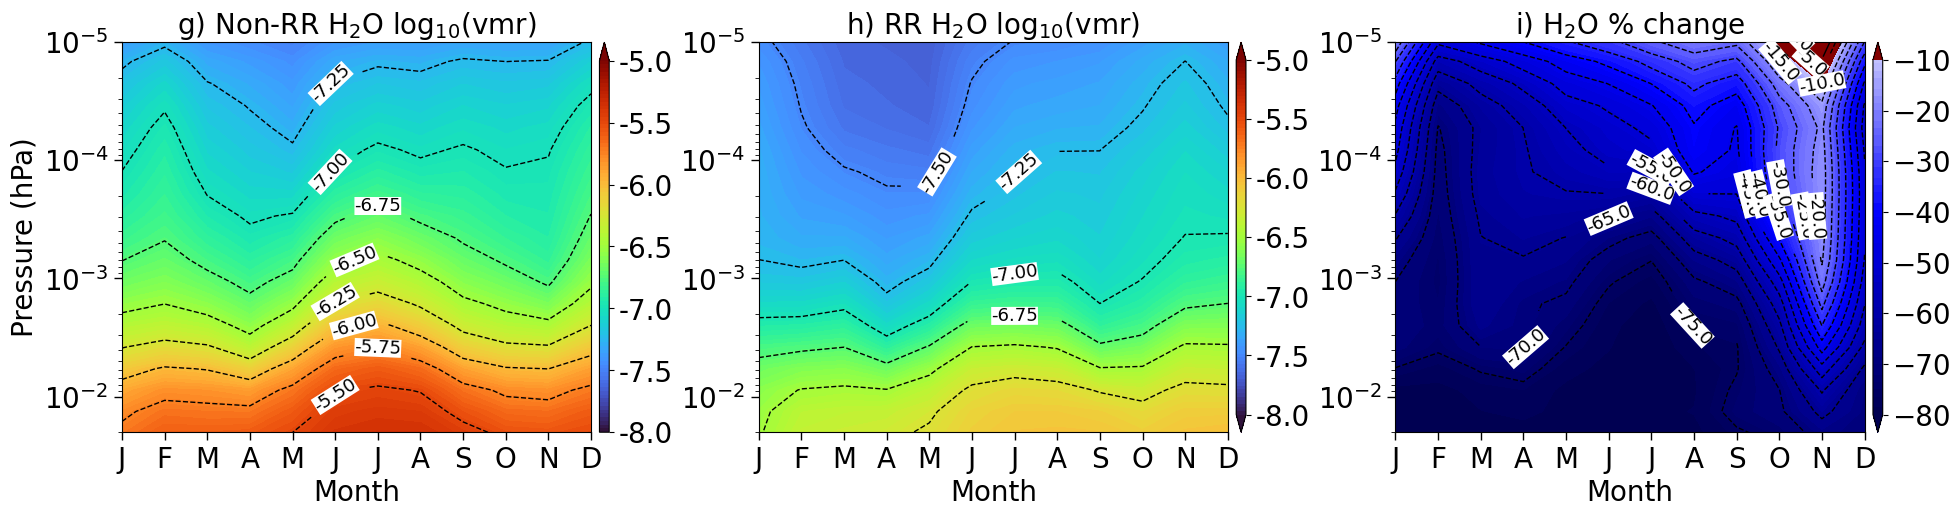

In [56]:
#=============================================
# PLOT
#=============================================
importlib.reload(Plot_2D_time_height) # this reloads the module in case there have been saved changes

# Define standard values for the preset and auto ones
# and auto-populate any values so they don't need to be duplicated by the user when using custom
if use_options == 'custom':
    #---------------------------------------------
    # Define additional/automatic values when using custom values
    #---------------------------------------------
    print(f'Using custom values')
    if z_axis_str == 'on_z':                            # Using geometric altitude, y_r set above
        use_z = True 
    else:                                               # Using pressure levels, y_r set above
        use_z = False
    if use_scaling == False:                            # Set scaling to 1 unless scaling is being used
        scale_factor = 1e0
    if use_auto_filename == True:                       # autogenerate figure filename if required
        filename = z_axis_str+'_'+var+'_mm_cm'
    if use_automatic_naming == True:                    # autogenerate figure titles if required
        ax0_title,ax1_title,diff_title=autoset_titles(time_str,var,use_log,scale_factor,\
                                                      diff_type,label_subplots,label_start)
else:
    #---------------------------------------------
    # Define values for presets, auto (or unparsable input)
    #---------------------------------------------
    if use_options == 'preset':
        print(f'Using preset values for {var}')
    elif use_options == 'auto':
        print(f'Using automatically assigned values')
    else:
        print(f'Could not parse "{use_options}", using auto instead')  

    if z_axis_str == 'on_z':                            # Using geometric altitude
        use_z = True                                       # Use z values
        y_range = [65,115]                                 # Specify range of altitudes
    else:                                               # Using pressure levels
        use_z = False                                      # Do not use z values (use pressure levels)
        y_range = [2e-2,1e-5]                              # Specify range of pressures
    use_cont = True                                     # Show contors
    sp_width =  6.5                                     # Subplot width (in inches)
    sp_height = 5                                       # Plot height (in inches)
    
    use_log,use_scaling,scale_factor,qr,diff_type,diffqr,ncont1,ncont2,diffcont,fmt1_cbar,fmt2_cbar,\
    fmtdiff_cbar,fmt1_cont,fmt2_cont,fmtdiff_cont,override_cbar,override_cont,format_cbar,\
    format_cont = use_preset(use_z,var,use_options)     # Set variables defined in use_preset
    
    fill_contours = True                                # Use filled contouring on dataplots (True) or raw data (False)
    nfill = 100                                         # How many filled contours to use
    cont_label_size = 13                                # Contour label size
    fontsize = 20                                       # Controls plot fontsize - labels and ticks
    suptitle = None                                     # Don't use a suptitle
    filename = z_axis_str+'_'+var+'_mm_cm'              # autogenerate figure filename
    
    ax0_title,ax1_title,diff_title=autoset_titles(time_str,var,use_log,scale_factor,diff_type,\
                                                  label_subplots,label_start) # autogenerate plot labels
    
    dpi = 100                                           # specify dpi to use if figure is saved
    # Currently no way to label the cbars, but this is the old O_n example: 'x10$^{11}$ cm$^{-3}$',
    

# -----------------------------------------------
# -----------------------------------------------
# Do not remove

if plot_one == False:                                   # Plotting both RR and non-RR
    ds = [ds_nonrr[var], ds_rr[var]]
    plot_which = 'both'
else:                                                   # Only plotting one
    diff_type = None                                    # No diff plot!
    if plot_which == 'RR':
        ds = [ds_rr[var]]#, ds_rr[var]]                  
    elif plot_which == 'Non-RR' or 'non-RR' or 'nonRR':
        plot_which = 'Non-RR'
        ds = [ds_nonrr[var]]
    else:
        print(f'Could not parse plot_which:"{plot_which}", please use either "RR" or "Non-RR"')
# -----------------------------------------------
# -----------------------------------------------

importlib.reload(Plot_2D_time_height) # If I make any changes to function and don't want to reload all data

## Pack settings into dict for plotting controls. See above for definitions and to set options!
arg_dict = { 
    'ds':ds, # datasets
    'var': var,
    'plot_one': plot_which,
    'z':use_z,
    'y_r':y_range,
    'log':use_log,
    'exp':scale_factor,
    'qr':qr,
    'diff_type': diff_type, 
    'diffqr':diffqr, 
    'cont':use_cont, 
    'ncont1':ncont1,
    'ncont2':ncont2,
    'diffcont':diffcont,
    'x_size': sp_width,
    'y_size': sp_height,
    'fmt1_cbar':fmt1_cbar,
    'fmt1_cont':fmt1_cont,
    'fmt2_cbar':fmt2_cbar,
    'fmt2_cont':fmt2_cont,
    'fmtdiff_cbar':fmtdiff_cbar,
    'fmtdiff_cont':fmtdiff_cont,
    'format_cbar':format_cbar,
    'format_cont':format_cont,
    'override_fmt_cbar':override_cbar,
    'override_fmt_cont':override_cont,
    'fill':fill_contours,
    'nfill':nfill,
    'fontsize':fontsize, 
    'cont_label_size':cont_label_size,
    'suptitle':suptitle,
    'filename':filename,
    'ax0_title':ax0_title,
    'ax1_title':ax1_title,
    'diff_title':diff_title,
    'savefig':save_fig,
    'path_to_save':save_path,
    'dpi': dpi,
    'use_options':use_options,
}
## Plot
ds_diff = Plot_2D_time_height.Plot_2D_time_height(**arg_dict)

In [51]:
for l in [1.0,2.0,3.0]:
    print(f"{l:.{fmtdiff_cont}f}")

1
2
3
